In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

# Setting matplotlib
%matplotlib inline


In [ ]:
import pandas as pd

In [ ]:
import csv

In [ ]:
import os

In [ ]:
from io import open_code
data = open ("/content/loan_approval_dataset.csv", "r")
print (data.read())

loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status
1,2, Graduate, No,9600000,29900000,12,778,2400000,17600000,22700000,8000000, Approved
2,0, Not Graduate, Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000, Rejected
3,3, Graduate, No,9100000,29700000,20,506,7100000,4500000,33300000,12800000, Rejected
4,3, Graduate, No,8200000,30700000,8,467,18200000,3300000,23300000,7900000, Rejected
5,5, Not Graduate, Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000, Rejected
6,0, Graduate, Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000, Rejected
7,5, Graduate, No,8700000,33000000,4,678,22500000,14800000,29200000,4300000, Approved
8,2, Graduate, Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000, Rejected
9,0, Graduate, Yes,800000,2200000,20,782,1300000,800000,2800000,600000, Approved
10,5, Not Graduate

In [ ]:
data1 = pd.read_csv ("/content/loan_approval_dataset.csv", header = 0)
print (data1)

      loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_t

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


1. We check if there are missing values.

In [ ]:
na_values = data1.isna().sum()

for column, value in na_values.items():
    if value > 0:
        print(f'Column: {column}, null values: {value}')

There are no NA values.

In [ ]:
import pandas as pd
print(data1.columns)


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


2. We delete the variables which are not interesting to us.


In [ ]:
import pandas as pd
df = data1.drop (' no_of_dependents', axis = 1)
print (df)
df1 = df.drop (' education' , axis = 1)
print (df1)
df2 = df1.drop ( ' loan_term' , axis = 1)
print (df2)
df_def = df2.drop ( ' luxury_assets_value' , axis = 1)
print (df_def)

      loan_id      education  self_employed   income_annum   loan_amount  \
0           1       Graduate             No        9600000      29900000   
1           2   Not Graduate            Yes        4100000      12200000   
2           3       Graduate             No        9100000      29700000   
3           4       Graduate             No        8200000      30700000   
4           5   Not Graduate            Yes        9800000      24200000   
...       ...            ...            ...            ...           ...   
4264     4265       Graduate            Yes        1000000       2300000   
4265     4266   Not Graduate            Yes        3300000      11300000   
4266     4267   Not Graduate             No        6500000      23900000   
4267     4268   Not Graduate             No        4100000      12800000   
4268     4269       Graduate             No        9200000      29700000   

       loan_term   cibil_score   residential_assets_value  \
0             12          

In [ ]:
df_def.isna().sum()

loan_id                      0
 self_employed               0
 income_annum                0
 loan_amount                 0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 bank_asset_value            0
 loan_status                 0
dtype: int64

3. We analyse the statistics related to numerical variables.

In [ ]:
df_def.describe ()

,loan_id,income_annum,loan_amount,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,5.059124e+06,1.513345e+07,599.936051,7.472617e+06,4.973155e+06,4.976692e+06
std,1232.498479,2.806840e+06,9.043363e+06,172.430401,6.503637e+06,4.388966e+06,3.250185e+06
min,1.000000,2.000000e+05,3.000000e+05,300.000000,-1.000000e+05,0.000000e+00,0.000000e+00
25%,1068.000000,2.700000e+06,7.700000e+06,453.000000,2.200000e+06,1.300000e+06,2.300000e+06
50%,2135.000000,5.100000e+06,1.450000e+07,600.000000,5.600000e+06,3.700000e+06,4.600000e+06
75%,3202.000000,7.500000e+06,2.150000e+07,748.000000,1.130000e+07,7.600000e+06,7.100000e+06
max,4269.000000,9.900000e+06,3.950000e+07,900.000000,2.910000e+07,1.940000e+07,1.470000e+07


Then, we analyse the statistics related to non numerical varibales.

In [ ]:
df_def.describe(include='object')

,self_employed,loan_status
count,4269,4269
unique,2,2
top,Yes,Approved
freq,2150,2656


4. Construction of our logistic model.

*   First of all, we need to trasnform our categorical variables in numerical ones. (ho tolto loan_id perchè non serviva per il modello)





In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(df_def)
df_def.drop(df_def.columns[0], axis=1, inplace=True)
print(df_def)

      loan_id  self_employed   income_annum   loan_amount   cibil_score  \
0           1             No        9600000      29900000           778   
1           2            Yes        4100000      12200000           417   
2           3             No        9100000      29700000           506   
3           4             No        8200000      30700000           467   
4           5            Yes        9800000      24200000           382   
...       ...            ...            ...           ...           ...   
4264     4265            Yes        1000000       2300000           317   
4265     4266            Yes        3300000      11300000           559   
4266     4267             No        6500000      23900000           457   
4267     4268             No        4100000      12800000           780   
4268     4269             No        9200000      29700000           607   

       residential_assets_value   commercial_assets_value   bank_asset_value  \
0                  

We check how many categorical variables we have.

In [ ]:
import pandas as pd
import numpy as np

# Definire il numero di osservazioni
num_obs = 5000

# Range per reddito annuo
income_min = 4000000
income_max = 10000000

# Range per importo del prestito
loan_min = 10000000
loan_max = 30000000

# Range per valore patrimoniale
asset_min = 1000000
asset_max = 20000000

# Range per punteggio di credito
credit_min = 300
credit_max = 900

# Generare dati numerici con un certo bias
df_def = pd.DataFrame({
    "self_employed": np.random.choice(["Yes", "No"], size=num_obs, p=[0.3, 0.7]),
    "income_annum": np.random.randint(income_min, income_max + 1, size=num_obs),
    "loan_amount": np.random.randint(loan_min, loan_max + 1, size=num_obs),
    "cibil_score": np.random.randint(credit_min, credit_max + 1, size=num_obs),
})

# Calcolare i valori patrimoniali utilizzando il DataFrame 'data'
df_def["residential_assets_value"] = (df_def["income_annum"] * 0.3).apply(lambda x: int(x)) + np.random.randint(asset_min, asset_max + 1, size=num_obs)
df_def["commercial_assets_value"] = (df_def["income_annum"] * 0.1).apply(lambda x: int(x)) + np.random.randint(asset_min, asset_max + 1, size=num_obs)
df_def["bank_asset_value"] = (df_def["income_annum"] * 0.2).apply(lambda x: int(x)) + np.random.randint(asset_min, asset_max + 1, size=num_obs)

def assign_status(row):
  # Get the relevant variables from the row
  income = row["income_annum"]
  assets = row["residential_assets_value"] + row["commercial_assets_value"] + row["bank_asset_value"]
  score = row["cibil_score"]

  # Define thresholds for each factor
  income_threshold = 6000000  # Minimum acceptable income
  asset_threshold = 15000000  # Minimum acceptable total assets
  score_threshold = 650  # Minimum acceptable credit score

  # Apply the conditions
  if income >= income_threshold and assets >= asset_threshold and score >= score_threshold:
    return "Approved"
  else:
    return "Rejected"

df_def["loan_status"] = df_def.apply(assign_status, axis=1)

print(df_def)





     self_employed  income_annum  loan_amount  cibil_score  \
0               No       9622828     14797514          540   
1               No       9505908     27817014          336   
2               No       7188875     25604103          630   
3              Yes       4657984     23300582          797   
4               No       5355755     28882533          859   
...            ...           ...          ...          ...   
4995           Yes       8343530     29697360          805   
4996            No       6414653     14754636          891   
4997            No       8155336     19259997          875   
4998            No       6230116     13558587          733   
4999            No       6861417     19890963          346   

      residential_assets_value  commercial_assets_value  bank_asset_value  \
0                     20041421                 20523609          21014254   
1                      8139217                 17196802           6039120   
2                     12

In [ ]:
for column in df_def.select_dtypes(include=['object']):
    print(f'{column}: {df_def[column].unique()}')

self_employed: ['No' 'Yes']
loan_status: ['Rejected' 'Approved']


And we tranform them in numerical ones.

In [ ]:
for column in df_def.select_dtypes(include=['object']):
    df_def[column] = le.fit_transform(df_def[column])
    print(f'{column}: {df_def[column].unique()}')

self_employed: [0 1]
loan_status: [1 0]


In [ ]:
df_def.head()

,self_employed,income_annum,loan_amount,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,loan_status
0,0,9622828,14797514,540,20041421,20523609,21014254,1
1,0,9505908,27817014,336,8139217,17196802,6039120,1
2,0,7188875,25604103,630,12319025,11586534,11060563,1
3,1,4657984,23300582,797,15097478,13738949,15002022,1
4,0,5355755,28882533,859,7935947,4323126,15641063,1


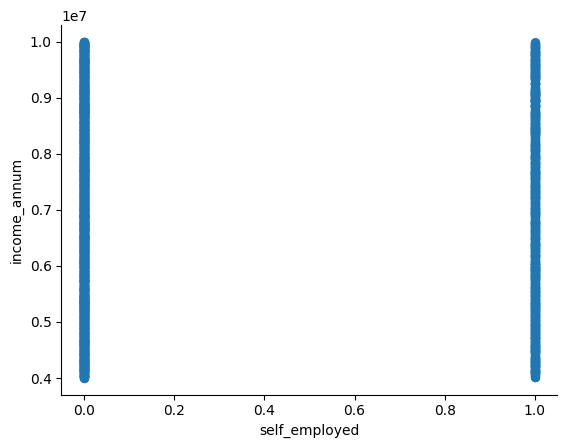

In [ ]:
# @title  self_employed vs  income_annum

from matplotlib import pyplot as plt
df_def.plot(kind='scatter', x='self_employed', y='income_annum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

* The next step is to prepare the data. We want to separate our variable of interest from the others. First we build a new dataframe deleting the variable we want to study (loan_approval). The final step is to put loan_approval inside a distinct object. To preserve the dataframe we create a new one(data_model).

In [ ]:
data_model=df_def
print(data_model)

      self_employed  income_annum  loan_amount  cibil_score  \
0                 0       9622828     14797514          540   
1                 0       9505908     27817014          336   
2                 0       7188875     25604103          630   
3                 1       4657984     23300582          797   
4                 0       5355755     28882533          859   
...             ...           ...          ...          ...   
4995              1       8343530     29697360          805   
4996              0       6414653     14754636          891   
4997              0       8155336     19259997          875   
4998              0       6230116     13558587          733   
4999              0       6861417     19890963          346   

      residential_assets_value  commercial_assets_value  bank_asset_value  \
0                     20041421                 20523609          21014254   
1                      8139217                 17196802           6039120   
2           

We group the variables together (all the Xs) without the variable of interest.

In [ ]:
X= data_model.drop('loan_status', axis=1)
X

,self_employed,income_annum,loan_amount,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value
0,0,9622828,14797514,540,20041421,20523609,21014254
1,0,9505908,27817014,336,8139217,17196802,6039120
2,0,7188875,25604103,630,12319025,11586534,11060563
3,1,4657984,23300582,797,15097478,13738949,15002022
4,0,5355755,28882533,859,7935947,4323126,15641063
...,...,...,...,...,...,...,...
4995,1,8343530,29697360,805,15725276,16241437,15617923
4996,0,6414653,14754636,891,4521017,15718754,6905832
4997,0,8155336,19259997,875,17184316,16658260,13265582
4998,0,6230116,13558587,733,12229170,7518783,3543942


We put our variable of interest inside an object.

In [ ]:
Y = data_model[['loan_status']]
print(Y)

      loan_status
0               1
1               1
2               1
3               1
4               1
...           ...
4995            0
4996            0
4997            0
4998            0
4999            1

[5000 rows x 1 columns]


We split the model in test sets and train sets. (In classification, the data is split into two parts: training and testing sets. The model is trained on a training set, and its performance is examined on a testing set. The training set contains 80% of the data, whereas the test set contains 20%)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

We create the logistic model.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=42)
model

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
model_prediction = model.predict(X_test)
model_prediction

array([0, 1, 1, ..., 1, 1, 1])

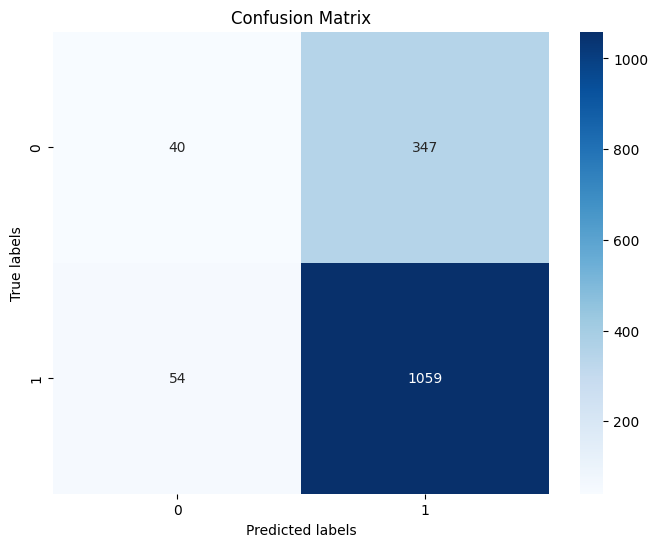

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
cm = confusion_matrix(Y_test, model_prediction)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(Y_test, model_prediction))

              precision    recall  f1-score   support

           0       0.43      0.10      0.17       387
           1       0.75      0.95      0.84      1113

    accuracy                           0.73      1500
   macro avg       0.59      0.53      0.50      1500
weighted avg       0.67      0.73      0.67      1500



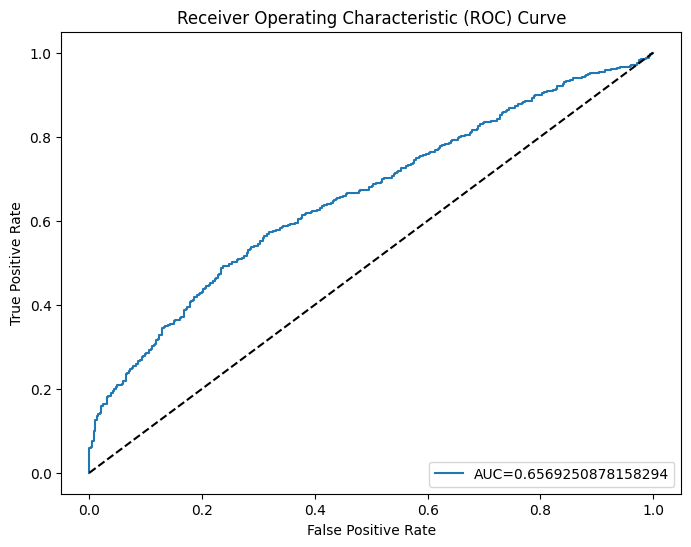

In [ ]:
Y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  Y_pred_proba)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="AUC="+str(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


5. We build a glm to see if our variables are all statistically significant.

In [ ]:
pip install statsmodels

In [ ]:
import statsmodels.api as sm
glm = sm.GLM(Y_train,
X_train,
family=sm.families.Binomial())
results = glm.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:                 3500
Model:                            GLM   Df Residuals:                     3493
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1718.7
Date:                Mon, 22 Apr 2024   Deviance:                       3437.3
Time:                        17:34:51   Pearson chi2:                 3.32e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1874
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
self_employed           

From the summary we can see that resedential_assets_value, commercial_assets_value and bank_asset_value have an high P-value. We can cut them off the model and see how our glm and logistic model change.

In [ ]:
X1 = X.drop (X.columns[5], axis=1)
X1
X2 = X1.drop (X1.columns[5], axis=1)
X2
X3 = X2.drop (X2.columns[4], axis=1)
X3

,self_employed,income_annum,loan_amount,cibil_score
0,0,7085932,19275295,315
1,1,5877467,17218641,712
2,1,6079196,26423404,585
3,0,8683525,27337743,569
4,0,7316174,18586527,679
...,...,...,...,...
4995,0,6950265,24219796,788
4996,0,8428393,26171464,685
4997,1,4346368,24254659,853
4998,0,4043280,13961919,761


In [ ]:
X3_train, X3_test, Y_train, Y_test = train_test_split(X3, Y, test_size = 0.3, random_state = 42)
X3_train
Y_train

,loan_status
1840,1
2115,1
4437,1
1146,0
2486,0
...,...
4426,1
466,1
3092,0
3772,1


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
glm1 = sm.GLM(Y_train, X3_train, family= sm.families.Binomial())
results = glm1.fit()
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:                 3500
Model:                            GLM   Df Residuals:                     3496
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1881.4
Date:                Mon, 22 Apr 2024   Deviance:                       3762.7
Time:                        17:35:07   Pearson chi2:                 3.29e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1083
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
self_employed     0.3888      0.090      4.341

In [ ]:
model1 = LogisticRegression(solver='liblinear', random_state=42)
model1

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
model1.fit(X3_train, Y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
model1_prediction = model1.predict(X3_test)
model1_prediction

array([1, 1, 1, ..., 1, 1, 1])

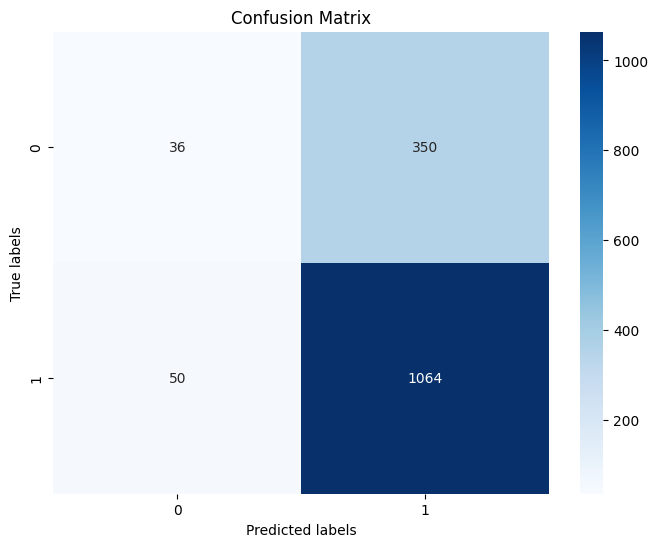

In [ ]:
cm1 = confusion_matrix(Y_test, model1_prediction)
plt.figure(figsize=(8,6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(Y_test, model1_prediction))

              precision    recall  f1-score   support

           0       0.42      0.09      0.15       386
           1       0.75      0.96      0.84      1114

    accuracy                           0.73      1500
   macro avg       0.59      0.52      0.50      1500
weighted avg       0.67      0.73      0.66      1500



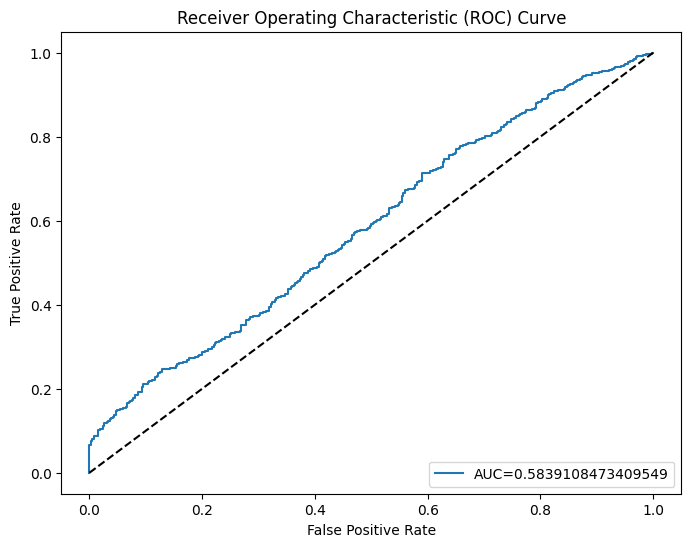

In [ ]:
Y1_pred_proba = model1.predict_proba(X3_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  Y1_pred_proba)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="AUC="+str(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

6. We can study the correlations between the variables.

In [ ]:
corr_matrix = df_def.corr().round(2)
corr_matrix

,self_employed,income_annum,loan_amount,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,loan_status
self_employed,1.00,0.00,-0.02,0.01,-0.01,-0.02,0.02,-0.00
income_annum,0.00,1.00,0.01,-0.01,0.09,0.03,0.09,-0.35
loan_amount,-0.02,0.01,1.00,-0.01,0.03,-0.00,-0.00,-0.01
cibil_score,0.01,-0.01,-0.01,1.00,-0.04,-0.01,0.01,-0.62
residential_assets_value,-0.01,0.09,0.03,-0.04,1.00,-0.02,0.01,-0.00
commercial_assets_value,-0.02,0.03,-0.00,-0.01,-0.02,1.00,0.01,-0.02
bank_asset_value,0.02,0.09,-0.00,0.01,0.01,0.01,1.00,-0.05
loan_status,-0.00,-0.35,-0.01,-0.62,-0.00,-0.02,-0.05,1.00


NameError: name 'heatmap' is not defined

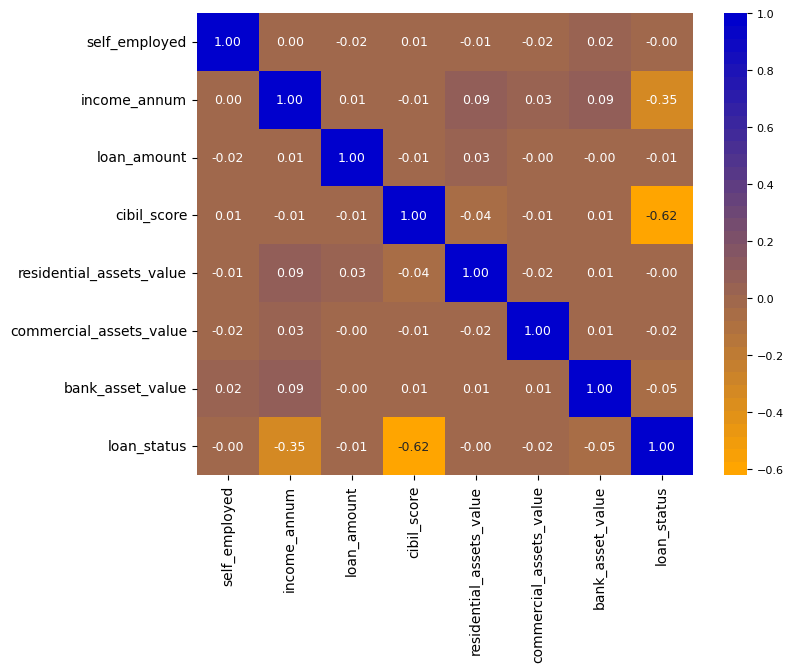

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(corr_matrix, annot=True,
                      cmap=sns.blend_palette(["#FFa500", "#0000cd"], 36), fmt=".2f", annot_kws={"size": 9})
ax.figure.axes[-1].tick_params(labelsize=8)
ax.figure.axes[-1].yaxis.label.set_size(10)
ax.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)
ax.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.show();

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 70.13%


In [ ]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.30      0.34       386
           1       0.78      0.84      0.81      1114

    accuracy                           0.70      1500
   macro avg       0.59      0.57      0.57      1500
weighted avg       0.68      0.70      0.69      1500

Confusion Matrix:
[[116 270]
 [178 936]]


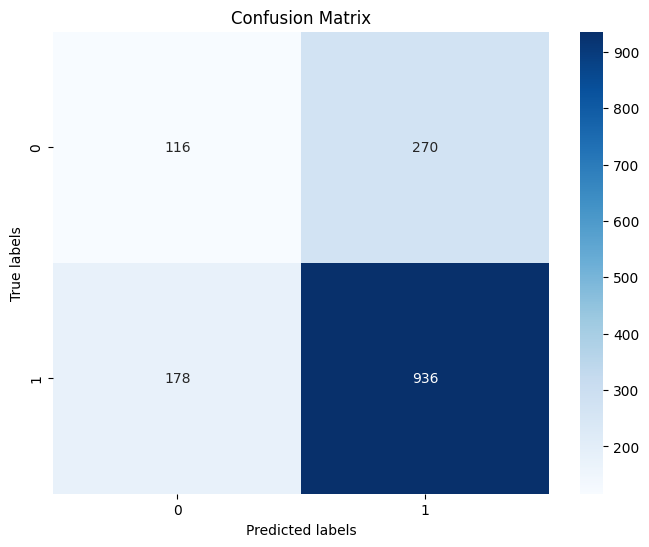

In [ ]:
cm2 = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from io import open_code
data = open ("/content/data1.csv", "r")
print (data.read())

loan_status;self_employed;income_annum;loan_amount;cibil_score;residential_asset_value;commercial_asset_value;banck_asset_value
0;1;2500000;33000000;896;1230000;456000;6700000
1;0;4500000;24000000;567;3450000;5980000;65789000
1;0;1400000;67500000;657;4560000;129000000;89500000
1;0;14300000;45670000;599;12460000;4780000;1400000
1;1;8700000;57800000;452;5670000;24000000;56000000
1;1;5600000;129000000;895;89500000;57600000;89000000
0;1;1600000;500000;900;7600000;45790000;56000000
1;0;4600000;76600000;876;6500000;33560000;30000000
0;0;7600000;34500000;689;4780000;38790000;43300000
1;0;6500000;569000;587;7658000;56700000;78990000



In [ ]:
data_prediction = pd.read_csv ("/content/data1.csv", header = 0)
print (data_prediction)

  loan_status;self_employed;income_annum;loan_amount;cibil_score;residential_asset_value;commercial_asset_value;banck_asset_value
0    0;1;2500000;33000000;896;1230000;456000;6700000                                                                             
1  1;0;4500000;24000000;567;3450000;5980000;65789000                                                                             
2  1;0;1400000;67500000;657;4560000;129000000;895...                                                                             
3  1;0;14300000;45670000;599;12460000;4780000;140...                                                                             
4  1;1;8700000;57800000;452;5670000;24000000;5600...                                                                             
5  1;1;5600000;129000000;895;89500000;57600000;89...                                                                             
6   0;1;1600000;500000;900;7600000;45790000;56000000                                      

In [ ]:
dataset = {
    " loan_status" : [0,1,1,1,1,1,0,1,0,1],
    " self_employed" : [1,0,0,0,1,1,1,0,0,0],
    " income_annum" : [2500000,4500000,1400000,1430000,8700000,56000000,1600000,4600000,76000000,6500000],
    " loan_amount" : [33000000,24000000,67500000,45670000,57800000,12900000,500000,7660000,35400000,569000],
    " cibil_score" : [896,567,657,599,452,895,900,876,689,587],
    " residential_assets_value" : [1230000,3450000,4560000,12460000,5670000,89500000,7600000,6500000,4780000,7658000],
    " commercial_assets_value" : [456000,5980000,129000000,4780000,2400000,57600000,45790000,33560000,38790000,56700000],
    " bank_asset_value" : [6700000,65789000,89500000,1400000,56000000,89000000,560000000,8900000,56000000,30000000]
}

In [ ]:
dframe = pd.DataFrame(dataset)
print(dframe)

    loan_status   self_employed   income_annum   loan_amount   cibil_score  \
0             0               1        2500000      33000000           896   
1             1               0        4500000      24000000           567   
2             1               0        1400000      67500000           657   
3             1               0        1430000      45670000           599   
4             1               1        8700000      57800000           452   
5             1               1       56000000      12900000           895   
6             0               1        1600000        500000           900   
7             1               0        4600000       7660000           876   
8             0               0       76000000      35400000           689   
9             1               0        6500000        569000           587   

    residential_assets_value   commercial_assets_value   bank_asset_value  
0                    1230000                    456000           

In [ ]:
Ydf = dframe[[" loan_status"]]
print (Ydf)

    loan_status
0             0
1             1
2             1
3             1
4             1
5             1
6             0
7             1
8             0
9             1


In [ ]:
Xdf = dframe.drop(' loan_status', axis=1)
print (Xdf)

    self_employed   income_annum   loan_amount   cibil_score  \
0               1        2500000      33000000           896   
1               0        4500000      24000000           567   
2               0        1400000      67500000           657   
3               0        1430000      45670000           599   
4               1        8700000      57800000           452   
5               1       56000000      12900000           895   
6               1        1600000        500000           900   
7               0        4600000       7660000           876   
8               0       76000000      35400000           689   
9               0        6500000        569000           587   

    residential_assets_value   commercial_assets_value   bank_asset_value  
0                    1230000                    456000            6700000  
1                    3450000                   5980000           65789000  
2                    4560000                 129000000           89

In [ ]:
from sklearn.model_selection import train_test_split
Xdf_train, Xdf_test, Ydf_train, Ydf_test = train_test_split(Xdf, Ydf, test_size = 0.3, random_state = 42)

we need to reshape the array from 4 dimensions to 2

In [ ]:
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(Xdf_train, Ydf_train)
y_pred = knn.predict(Xdf_test)
sample = [[Xdf]]
prediction = knn.predict(sample)
print(f"Prediction for the sample {sample}: {Y[prediction]}")

ValueError: Found array with dim 4. KNeighborsClassifier expected <= 2.

We try to perform a "Random forest" to predict the status of loans, and then we will combine this method with the logistic regression one

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators= 100, random_state=42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictions = random_forest.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9993333333333333


In [ ]:
dataset = {
    " loan_status" : [0,1,1,1,1,1,0,1,0,1],
    " self_employed" : [1,0,0,0,1,1,1,0,0,0],
    " income_annum" : [2500000,4500000,1400000,1430000,8700000,56000000,1600000,4600000,76000000,6500000],
    " loan_amount" : [33000000,24000000,67500000,45670000,57800000,12900000,500000,7660000,35400000,569000],
    " cibil_score" : [896,567,657,599,452,895,900,876,689,587],
    " residential_assets_value" : [1230000,3450000,4560000,12460000,5670000,89500000,7600000,6500000,4780000,7658000],
    " commercial_assets_value" : [456000,5980000,129000000,4780000,2400000,57600000,45790000,33560000,38790000,56700000],
    " bank_asset_value" : [6700000,65789000,89500000,1400000,56000000,89000000,560000000,8900000,56000000,30000000]
}



In [ ]:
df_prediction = pd.DataFrame(dataset)
print(df_prediction)

    loan_status   self_employed   income_annum   loan_amount   cibil_score  \
0             0               1        2500000      33000000           896   
1             1               0        4500000      24000000           567   
2             1               0        1400000      67500000           657   
3             1               0        1430000      45670000           599   
4             1               1        8700000      57800000           452   
5             1               1       56000000      12900000           895   
6             0               1        1600000        500000           900   
7             1               0        4600000       7660000           876   
8             0               0       76000000      35400000           689   
9             1               0        6500000        569000           587   

    residential_assets_value   commercial_assets_value   bank_asset_value  
0                    1230000                    456000           

In [ ]:
X_new = df_prediction.drop(' loan_status', axis=1)
new_predictions = random_forest.predict(X_new)
print("Predictions for the new dataset:")
print(new_predictions)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
-  bank_asset_value
-  cibil_score
-  commercial_assets_value
-  income_annum
-  loan_amount
- ...
Feature names seen at fit time, yet now missing:
- bank_asset_value
- cibil_score
- commercial_assets_value
- income_annum
- loan_amount
- ...


Now we will combine the two methods to predict more accurately our observation

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_classifier = VotingClassifier(estimators= [('lr', model), ('rf', random_forest)], voting= 'hard')

In [ ]:
voting_classifier.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf', RandomForestClassifier(random_state=42))])

In [ ]:
print("logist regressiom predict",model.score(X_test, Y_test))
print("Randomforest Predict", random_forest.score(X_test, Y_test))
print("Voting Classifier Predict",voting_classifier.score(X_test, Y_test))

logist regressiom predict 0.6705698672911787
Randomforest Predict 0.9492583918813428
Voting Classifier Predict 0.6799375487900078


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
y_pred = model.predict(X_test)

Now we perform again the two model over the same dataset, to check the accuracy of the prediction their are able to made over their training data

In [ ]:
Y_pred_log = model.predict(X_test)
Y_pred_log

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
Y_pred_rf = random_forest.predict(X_test)
Y_pred_rf

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
accuracy_model = accuracy_score(Y_test, Y_pred_log)
Y_pred_RandomForest = random_forest.predict(X_test)
random_forest.fit(X_test, Y_test)
accuracy_Random_forest = accuracy_score(Y_test, Y_pred_rf)
print("Accuracy_Random_forest:", accuracy_Random_forest)



Accuracy_Random_forest: 1.0


In [ ]:
model.fit(X_train, Y_train)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy logistic model:", accuracy)

Accuracy logistic model: 0.6705698672911787


In [ ]:

precision_model1 = precision_score(Y_test, Y_pred_log)
precision_model2 = precision_score(Y_test, Y_pred_rf)
print("precision of logistic model:", precision_model1)
print("precision of Random forest:",precision_model2)


precision of logistic model: 0.8266666666666667
precision of Random forest: 1.0


In [ ]:
recall_model1 = recall_score(Y_test, Y_pred_log)
recall_model2 = recall_score(Y_test, Y_pred_rf)
print("recall of logistic model:", recall_model1)
print("recall of Random forest:",recall_model2)

recall of logistic model: 0.1316348195329087
recall of Random forest: 1.0


In [ ]:
f1_model1 = f1_score(Y_test, Y_pred_log)
f1_model2 = f1_score(Y_test, Y_pred_rf)
print("f1 of logistic model:", f1_model1)
print("f1 of Random forest:",f1_model2)

f1 of logistic model: 0.22710622710622713
f1 of Random forest: 1.0


In [ ]:
roc_auc_model1 = roc_auc_score(Y_test, y_pred)
roc_auc_model2 = roc_auc_score(Y_test, Y_pred_RandomForest)

In [ ]:
print("Model 1:")
print(f"Accuracy: {accuracy_model1:.4f}, Precision: {precision_model1:.4f}, Recall: {recall_model1:.4f}, F1-score: {f1_model1:.4f}, ROC AUC: {roc_auc_model1:.4f}")
print("Model 2:")
print(f"Accuracy: {accuracy_Random_forest:.4f}, Precision: {precision_model2:.4f}, Recall: {recall_model2:.4f}, F1-score: {f1_model2:.4f}, ROC AUC: {roc_auc_model2:.4f}")


Model 1:
Accuracy: 0.6706, Precision: 0.8267, Recall: 0.1316, F1-score: 0.2271, ROC AUC: 0.5578
Model 2:
Accuracy: 0.9493, Precision: 0.8830, Recall: 0.9936, F1-score: 0.9351, ROC AUC: 0.9585


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
models = ['Model 1', 'Model 2']
accuracies = [accuracy_model1, accuracy_Random_forest]
precisions = [precision_model1, precision_model2]
recalls = [recall_model1, recall_model2]
f1_scores = [f1_model1, f1_model2]
roc_auc_scores = [roc_auc_model1, roc_auc_model2]

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores,
    'ROC AUC': roc_auc_scores
})

In [ ]:
print(df)

     Model  Accuracy  Precision    Recall  F1-score   ROC AUC
0  Model 1  0.670570   0.826667  0.131635  0.227106  0.557793
1  Model 2  0.949258   0.883019  0.993631  0.935065  0.958544


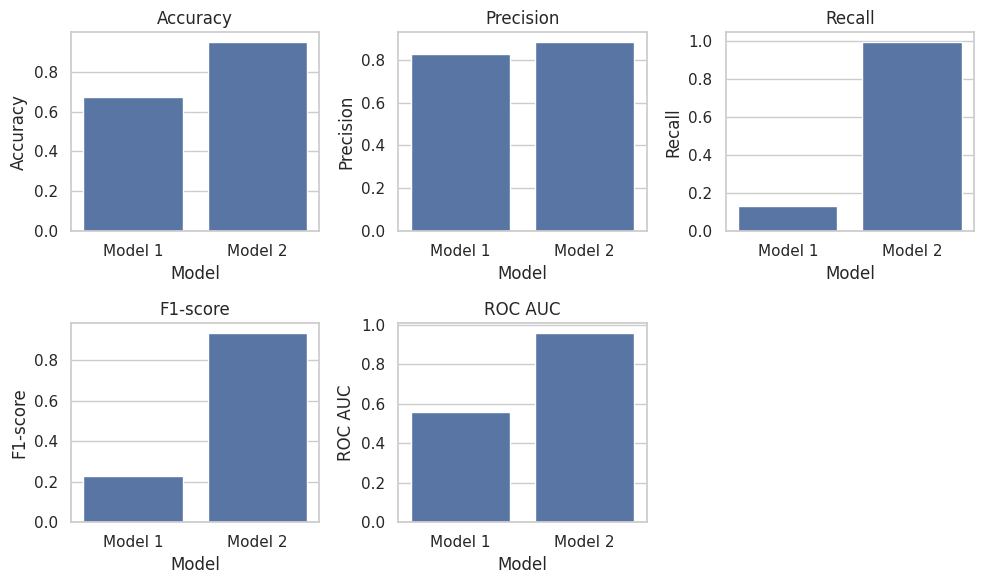

In [ ]:

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(2, 3, 1)
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Accuracy')

# Precision plot
plt.subplot(2, 3, 2)
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Precision')

# Recall plot
plt.subplot(2, 3, 3)
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Recall')

# F1-score plot
plt.subplot(2, 3, 4)
sns.barplot(x='Model', y='F1-score', data=df)
plt.title('F1-score')

# ROC AUC plot
plt.subplot(2, 3, 5)
sns.barplot(x='Model', y='ROC AUC', data=df)
plt.title('ROC AUC')

plt.tight_layout()
plt.show()

Per vedere l'iperparametrizzazione possiamo utilizzare la grid search.

In [ ]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
std_slc = StandardScaler()

In [ ]:
n_components = list(range(1,X.shape[1]+1,1))

In [ ]:
pca = decomposition.PCA()

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('pca', pca),
                        ('model_log', model)])

In [ ]:
 C = np.logspace(-4, 4, 50)
 penalty = ['l1', 'l2']

In [ ]:
 parameters = dict(pca__n_components=n_components,
                      model_log__C=C,
                      model_log__penalty=penalty)

In [ ]:
grid1 = GridSearchCV(pipe, parameters)
grid1.fit(Y_test, model_prediction)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model_log',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'model_log__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'model_log__penalty': ['l1', 'l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7]})

In [ ]:
print('Best Penalty:', grid1.best_estimator_.get_params()['model_log__penalty'])
print('Best C:', grid1.best_estimator_.get_params()['model_log__C'])
print('Best Number Of Components:', grid1.best_estimator_.get_params()['pca__n_components'])
print(); print(grid1.best_estimator_.get_params()['model_log'])

Best Penalty: l2
Best C: 0.0001
Best Number Of Components: 1

LogisticRegression(C=0.0001, random_state=42, solver='liblinear')


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
grid1.fit(X_train, Y_train)
grid1_predicitons = grid1.predict(X_test)
print(classification_report(Y_test, grid1_predicitons))
print('Mean Accuracy (test set): %.3f' % accuracy_score(Y_test, grid1_predicitons))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       436
           1       0.94      0.94      0.94      1064

    accuracy                           0.91      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.91      0.91      0.91      1500

Mean Accuracy (test set): 0.911


In [ ]:
print("Best Parameters:", grid1.best_params_)
print("Best Accuracy:", grid1.best_score_)

Best Parameters: {'model_log__C': 0.3906939937054613, 'model_log__penalty': 'l2', 'pca__n_components': 7}
Best Accuracy: 0.9091428571428573


In [ ]:
best_model = grid1.best_estimator_
test_accuracy = best_model.score(X_test, Y_test)
print("Test Accuracy of Best Model:", test_accuracy)

Test Accuracy of Best Model: 0.9106666666666666


In [ ]:
print('Best hyperparameters are: '+str(grid1.best_params_))
print('Best score is: '+str(grid1.best_score_))

Best hyperparameters are: {'model_log__C': 0.3906939937054613, 'model_log__penalty': 'l2', 'pca__n_components': 7}
Best score is: 0.9091428571428573
